In [65]:
from datetime import date, datetime, timedelta
import pandas as pd
import numpy as np
import glob
%matplotlib notebook
import matplotlib.pyplot as plt
import sys
import datetime
# sys.path.insert(0, "../tools")
from covid19_DTM.data.mobility import * # contains all necessary functions
from covid19_DTM.visualization.output import *
from covid19_DTM.data.sciensano import get_sciensano_COVID19_data_spatial, get_sciensano_COVID19_data
from covid19_DTM.data.mobility import get_google_mobility_data

# OPTIONAL: Load the "autoreload" extension so that package code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
# Import Sciensano data
sciensano_df = get_sciensano_COVID19_data_spatial(agg='arr').sum(axis=1)

sciensano_values= sciensano_df.values
sciensano_dates = sciensano_df.index

In [67]:
# All key dates copied from tdpf

t0 = pd.Timestamp('2020-02-15') # first Google date

# Define key dates of first wave
t1 = pd.Timestamp('2020-03-15') # start of lockdown
t2 = pd.Timestamp('2020-05-01') # gradual re-opening of schools (assume 50% of nominal scenario)
t3 = pd.Timestamp('2020-07-01') # start of summer holidays
t4 = pd.Timestamp('2020-08-01') # Summer lockdown in Antwerp
t5 = pd.Timestamp('2020-08-24') # End of summer lockdown in Antwerp
t6 = pd.Timestamp('2020-09-01') # end of summer holidays
t7 = pd.Timestamp('2020-09-21') # Opening universities

# Define key dates of winter 2020-2021
t8 = pd.Timestamp('2020-10-19') # lockdown (1)
t9 = pd.Timestamp('2020-11-02') # lockdown (2)
t10 = pd.Timestamp('2020-11-16') # schools re-open
t11 = pd.Timestamp('2020-12-18') # Christmas holiday starts
t12 = pd.Timestamp('2021-01-04') # Christmas holiday ends
t13 = pd.Timestamp('2021-02-15') # Spring break starts
t14 = pd.Timestamp('2021-02-21') # Spring break ends
t15 = pd.Timestamp('2021-02-28') # Contact increase in children
t16 = pd.Timestamp('2021-03-26') # Start of Easter holiday
t17 = pd.Timestamp('2021-04-18') # End of Easter holiday
t18 = pd.Timestamp('2021-05-01') # Start of relaxations
t19 = pd.Timestamp('2021-07-01') # Start of Summer holiday

# Define key dates of winter 2021-2022
t20 = pd.Timestamp('2021-09-01') # End of Summer holiday
t21 = pd.Timestamp('2021-09-21') # Opening of universities
t22 = pd.Timestamp('2021-10-01') # Flanders releases all measures
t23 = pd.Timestamp('2021-11-01') # Start of autumn break
t24 = pd.Timestamp('2021-11-07') # End of autumn break
t25 = pd.Timestamp('2021-11-17') # Overlegcommite 1 out of 3
t26 = pd.Timestamp('2021-12-03') # Overlegcommite 3 out of 3
t27 = pd.Timestamp('2021-12-20') # Start of Christmass break (one week earlier than normal)
t28 = pd.Timestamp('2022-01-10') # End of Christmass break
t29 = pd.Timestamp('2022-02-28') # Start of Spring Break
t30 = pd.Timestamp('2022-03-06') # End of Spring Break
t31 = pd.Timestamp('2022-04-04') # Start of Easter Break
t32 = pd.Timestamp('2022-04-17') # End of Easter Break
t33 = pd.Timestamp('2022-07-01') # Start of summer holidays

# all_dates = np.array([t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12, t13, t14, t15, t16, t17, t18, t19, t20, t21, t22, t23, t24, t25, t26])

# Google Mobility Data per activity

**Insert Google Mobility parameters per province**

In [4]:
NIS = 60000

google_df = get_google_mobility_data(update=False, provincial=True)
google_df_dates = google_df.index.values
google_df.columns

google_df = google_df.reset_index().set_index('date')
google_df = google_df[google_df['NIS']==NIS].drop(columns=['NIS', 'parks', 'residential'])

google_df['g_home'] = 1
google_df['g_school'] = 0
google_df['g_work'] = 1 + google_df.work/100
google_df['g_transport'] = 1 + google_df.transport/100
google_df['g_leisure'] = 1 + google_df.retail_recreation/100
google_df['g_other'] = 1 + google_df.grocery/100

google_df = google_df.drop(columns=['work', 'transport', 'retail_recreation', 'grocery'])

# google_df.plot()

**Insert Google Mobility parameters nationally**

In [5]:
google_df = get_google_mobility_data(update=False, provincial=False)
google_df = google_df.drop(columns=['parks', 'residential'])

google_df['g_home'] = 1
google_df['g_school'] = 0
google_df['g_work'] = 1 + google_df.work/100
google_df['g_transport'] = 1 + google_df.transport/100
google_df['g_leisure'] = 1 + google_df.retail_recreation/100
google_df['g_other'] = 1 + google_df.grocery/100

google_df = google_df.drop(columns=['work', 'transport', 'retail_recreation', 'grocery'])

google_df.head()

,g_home,g_school,g_work,g_transport,g_leisure,g_other
date,,,,,,
2020-02-15,1,0,1.01,1.09,1.03,1.02
2020-02-16,1,0,0.97,0.97,0.93,0.97
2020-02-17,1,0,1.04,1.04,1.01,1.02
2020-02-18,1,0,1.04,1.06,1.03,1.03
2020-02-19,1,0,1.04,1.05,1.03,1.01


In [6]:
# Manually add school values

google_df.loc[google_df.index>=t0, 'g_school'] = 1
google_df.loc[google_df.index>=t1, 'g_school'] = 0 # ramp l1
google_df.loc[google_df.index>=t2, 'g_school'] = 0 # ramp l custom
google_df.loc[google_df.index>=t3, 'g_school'] = 0 # ramp l custom
google_df.loc[google_df.index>=t4, 'g_school'] = 0
google_df.loc[google_df.index>=t5, 'g_school'] = 0
google_df.loc[google_df.index>=t6, 'g_school'] = 0.7
google_df.loc[google_df.index>=t7, 'g_school'] = 1
google_df.loc[google_df.index>=t8, 'g_school'] = 1 # ramp l2
google_df.loc[google_df.index>=t9, 'g_school'] = 0
google_df.loc[google_df.index>=t10,'g_school'] = 1
google_df.loc[google_df.index>=t11,'g_school'] = 0
google_df.loc[google_df.index>=t12,'g_school'] = 1
google_df.loc[google_df.index>=t13,'g_school'] = 0
google_df.loc[google_df.index>=t14,'g_school'] = 1
google_df.loc[google_df.index>=t15,'g_school'] = 1
google_df.loc[google_df.index>=t16,'g_school'] = 0
google_df.loc[google_df.index>=t17,'g_school'] = 1
google_df.loc[google_df.index>=t18,'g_school'] = 1 # ramp l custom
google_df.loc[google_df.index>=t19,'g_school'] = 0 # ramp l custom
google_df.loc[google_df.index>=t20,'g_school'] = 0.7
google_df.loc[google_df.index>=t21,'g_school'] = 1
google_df.loc[google_df.index>=t22,'g_school'] = 1
google_df.loc[google_df.index>=t23,'g_school'] = 0
google_df.loc[google_df.index>=t24,'g_school'] = 1
google_df.loc[google_df.index>=t25,'g_school'] = 1
google_df.loc[google_df.index>=t26,'g_school'] = 1
google_df.loc[google_df.index>=t27,'g_school'] = 0

In [7]:
# Manually add intertia slope

l1 = 18
l2 = 9

def ramp_fun(Nc_old, Nc_new, t, t_start, l):
    return Nc_old + (Nc_new-Nc_old)/l * float( (t-t_start)/pd.Timedelta('1D') )

# Alter values after t1
for day in range(0, l1):
    time = t1+pd.Timedelta(days=day)
    value = ramp_fun(1, 0, time, t1, l1)
    google_df.loc[google_df.index==time, 'g_school'] = value

# Alter values after t2
l = (t3 - t2)/pd.Timedelta(days=1)
for day in range(0, int(l)):
    time = t2+pd.Timedelta(days=day)
    value = ramp_fun(0, 0, time, t2, l)
    google_df.loc[google_df.index==time, 'g_school'] = value
    
# Alter values after t3
l = (t4 - t3)/pd.Timedelta(days=1)
for day in range(0, int(l)):
    time = t3+pd.Timedelta(days=day)
    value = ramp_fun(0, 0, time, t3, l)
    google_df.loc[google_df.index==time, 'g_school'] = value
    
# Alter values after t8
for day in range(0, l2):
    time = t8+pd.Timedelta(days=day)
    value = ramp_fun(1, 1, time, t8, l2)
    google_df.loc[google_df.index==time, 'g_school'] = value
    
# Alter values after t18
l = (t19 - t18)/pd.Timedelta(days=1)
for day in range(0, int(l)):
    time = t18 + pd.Timedelta(days=day)
    value = ramp_fun(1, 1, time, t18, l)
    google_df.loc[google_df.index==time, 'g_school'] = value
    
# Alter values after t19
l = (t20 - t19)/pd.Timedelta(days=1)
for day in range(0, int(l)):
    time = t19 + pd.Timedelta(days=day)
    value = ramp_fun(0, 0, time, t19, l)
    google_df.loc[google_df.index==time, 'g_school'] = value

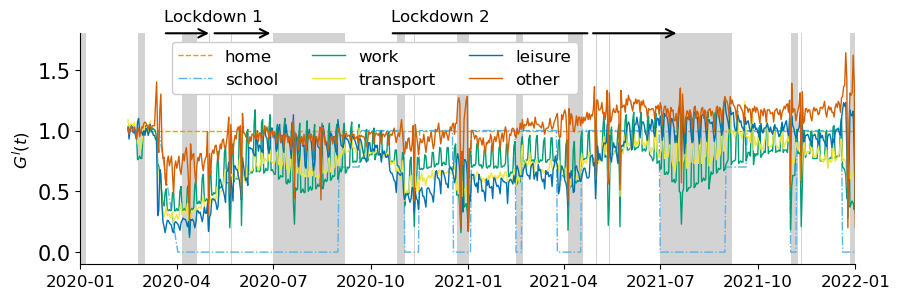

In [8]:
from covid19_DTM.visualization.utils import moving_avg
from covid19_DTM.visualization.output import *
from covid19_DTM.data import sciensano

start_date = datetime(2020, 1, 1, 0, 0)
end_date = datetime(2022, 1, 1, 0, 0)

fig, ax = plt.subplots(figsize=(10,3))
ticklabelsize = 12
ax.grid(False)
ax.set_xlim(start_date, end_date)
ylim=1.8
ax.set_ylim(-0.1, ylim)

ax.plot(google_df.index, google_df.values[:,0:1], linewidth=1, linestyle='--')
ax.plot(google_df.index, google_df.values[:,1:2], linewidth=1, linestyle='-.')
ax.plot(google_df.index, google_df.values[:,2:], linewidth=1, linestyle='-')#, color=['k', 'blue', 'k', 'blue', 'k', 'blue'])

week_color='white'#'white'
weekend_color='white'#'lightgrey'
vacation_color='lightgrey'#weekend_color
color_timeframes(start_date, end_date, ax=ax, week_color=week_color, weekend_color=weekend_color, vacation_color=vacation_color)

# google_df.plot(ax=ax, legend=False, linewidth=1.5)#, color=['k', 'blue', 'k', 'blue', 'k', 'blue'])
ax.set_xlabel(None, size=ticklabelsize)
ax.set_ylabel('$G^{l}(t)$', size=ticklabelsize)
plt.xticks(rotation=0, size=ticklabelsize)

ax.set_xlim(start_date, end_date)

ax.grid(False)

#####################
## Lockdown arrows ##
#####################

# Key dates
t4 = pd.Timestamp(2020, 3, 19, 0, 0) 
t5 = pd.Timestamp(2020, 5, 4, 0, 0)
t8 = pd.Timestamp(2020, 7, 1, 0, 0)
t11 = pd.Timestamp(2020, 10, 19, 0, 0)
t17 = pd.Timestamp(2021, 4, 26, 0, 0) 
t22 = pd.Timestamp(2021, 7, 19, 0, 0) 
t26 = pd.Timestamp(2021, 11, 17, 0, 0) 

# Add arrows denoting lockdown periods
linewidth=1.5
label_lockdown_size = 12
label_lockdown_move_up = 0.10
arrow_height = ylim
# First lockdown
ax.annotate(text='', xy=(t4, arrow_height), xytext=(t5,arrow_height), \
            arrowprops=dict(arrowstyle='<-',linewidth=linewidth))
ax.text(t4 + pd.Timedelta(days=1), \
        ylim + label_lockdown_move_up, 'Lockdown 1', size=label_lockdown_size)
# Lockdown release
ax.annotate(text='', xy=(t5, arrow_height), xytext=(t8,arrow_height), \
            arrowprops=dict(arrowstyle='<-',linewidth=linewidth))
# Second lockdown
label_lockdown1_move_right = -2.5 # days
ax.annotate(text='', xy=(t11, arrow_height), xytext=(t17,arrow_height), \
            arrowprops=dict(arrowstyle='-',linewidth=linewidth))
ax.text(t11 + pd.Timedelta(days=1), \
        ylim + label_lockdown_move_up, 'Lockdown 2', size=label_lockdown_size)
arrow_height = ylim
# Lockdown release
ax.annotate(text='', xy=(t17, arrow_height), xytext=(t22,arrow_height), \
            arrowprops=dict(arrowstyle='<-', linewidth=linewidth))


ax.legend(['home', 'school', 'work', 'transport', 'leisure', 'other'], loc='center', ncol=3,  bbox_to_anchor=(0.38, 0.85), fontsize=ticklabelsize, framealpha=1)
plt.savefig("GCM_resulting_timeseries.pdf", bbox_inches='tight', dpi=400)

# Effectivity parameters time series

Taken from `policies_all` tdpf used in the latest calibration.

NOTE: in the latest update all these values are fixed for dates in the past and calibrated over the _entire_ past. The only values that change are ones in the future, simulating particular future scenarios.

In [28]:
# Use the Google dataframe with new columns
google_df_bis = get_google_mobility_data(update=False, provincial=False)
google_df_bis = google_df_bis.drop(columns=['parks', 'residential'])

google_df_bis['omega_home'] = 0
google_df_bis['omega_school'] = 0
google_df_bis['omega_work'] = 0
google_df_bis['omega_rest'] = 0

google_df_bis.drop(columns=['retail_recreation', 'grocery', 'transport', 'work'], inplace=True)

In [29]:
# calibration values
prev_home_cal = 0.446
prev_home_cal = 0.046
prev_home_cal = 0.051

google_df_bis.loc[google_df.index>=t0, 'omega_home'] = 1
google_df_bis.loc[google_df.index>=t1, 'omega_home'] = 1
google_df_bis.loc[google_df.index>=t2, 'omega_home'] = 1
google_df_bis.loc[google_df.index>=t3, 'omega_home'] = 1
google_df_bis.loc[google_df.index>=t4, 'omega_home'] = 1
google_df_bis.loc[google_df.index>=t5, 'omega_home'] = 1
google_df_bis.loc[google_df.index>=t6, 'omega_home'] = 1
google_df_bis.loc[google_df.index>=t7, 'omega_home'] = 1
google_df_bis.loc[google_df.index>=t8, 'omega_home'] = 1
google_df_bis.loc[google_df.index>=t9, 'omega_home'] = 1
google_df_bis.loc[google_df.index>=t10,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t11,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t12,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t13,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t14,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t15,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t16,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t17,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t18,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t19,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t20,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t21,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t22,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t23,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t24,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t25,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t26,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t27,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t28,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t29,'omega_home'] = 1

In [30]:
# calibration values
prev_school_cal = 0.446
prev_school_cal = 0.046
prev_school_cal = 0.051

google_df_bis.loc[google_df.index>=t0, 'omega_school'] = 1
google_df_bis.loc[google_df.index>=t1, 'omega_school'] = 1
google_df_bis.loc[google_df.index>=t2, 'omega_school'] = 1
google_df_bis.loc[google_df.index>=t3, 'omega_school'] = 1
google_df_bis.loc[google_df.index>=t4, 'omega_school'] = 1
google_df_bis.loc[google_df.index>=t5, 'omega_school'] = 1
google_df_bis.loc[google_df.index>=t6, 'omega_school'] = 1
google_df_bis.loc[google_df.index>=t7, 'omega_school'] = 1
google_df_bis.loc[google_df.index>=t8, 'omega_school'] = 1
google_df_bis.loc[google_df.index>=t9, 'omega_school'] = 1
google_df_bis.loc[google_df.index>=t10,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t11,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t12,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t13,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t14,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t15,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t16,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t17,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t18,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t19,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t20,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t21,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t22,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t23,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t24,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t25,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t26,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t27,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t28,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t29,'omega_school'] = 1

In [31]:
# calibration values
prev_work_cal = 0.446
prev_work_cal = 0.046
prev_work_cal = 0.051

google_df_bis.loc[google_df.index>=t0, 'omega_work'] = 1
google_df_bis.loc[google_df.index>=t1, 'omega_work'] = 1
google_df_bis.loc[google_df.index>=t2, 'omega_work'] = 1
google_df_bis.loc[google_df.index>=t3, 'omega_work'] = 1
google_df_bis.loc[google_df.index>=t4, 'omega_work'] = 1
google_df_bis.loc[google_df.index>=t5, 'omega_work'] = 1
google_df_bis.loc[google_df.index>=t6, 'omega_work'] = 1
google_df_bis.loc[google_df.index>=t7, 'omega_work'] = 1
google_df_bis.loc[google_df.index>=t8, 'omega_work'] = 1
google_df_bis.loc[google_df.index>=t9, 'omega_work'] = 1
google_df_bis.loc[google_df.index>=t10,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t11,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t12,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t13,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t14,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t15,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t16,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t17,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t18,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t19,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t20,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t21,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t22,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t23,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t24,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t25,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t26,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t27,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t28,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t29,'omega_work'] = 1

In [32]:
# calibration values
prev_rest_cal = 0.446
prev_rest_cal = 0.046
prev_rest_cal = 0.051

google_df_bis.loc[google_df.index>=t0, 'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t1, 'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t2, 'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t3, 'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t4, 'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t5, 'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t6, 'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t7, 'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t8, 'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t9, 'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t10,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t11,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t12,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t13,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t14,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t15,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t16,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t17,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t18,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t19,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t20,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t21,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t22,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t23,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t24,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t25,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t26,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t27,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t28,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t29,'omega_rest'] = 1

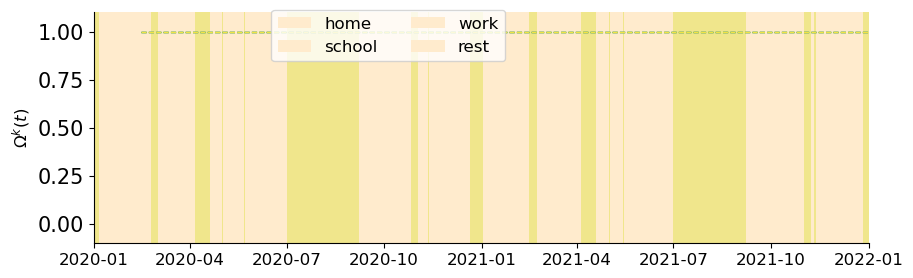

In [33]:
from covid19_DTM.visualization.utils import moving_avg
from covid19_DTM.visualization.output import *
from covid19_DTM.data import sciensano

start_date = datetime(2020, 1, 1, 0, 0)
end_date = datetime(2022, 1, 1, 0, 0)

fig, ax = plt.subplots(figsize=(10,3))
ticklabelsize = 12
ax.grid(False)
ax.set_xlim(start_date, end_date)
ylim=1.1
ax.set_ylim(-0.1, ylim)

week_color='blanchedalmond'#'white'
weekend_color='blanchedalmond'#'lightgrey'
vacation_color='khaki'#weekend_color
color_timeframes(start_date, end_date, ax=ax, week_color=week_color, weekend_color=weekend_color, vacation_color=vacation_color)

# ax.set_title('test', size=14)

ax.plot(google_df_bis.index, google_df_bis.values, linewidth=1, linestyle='--')
# google_df.plot(ax=ax, legend=False, linewidth=1.5)#, color=['k', 'blue', 'k', 'blue', 'k', 'blue'])
ax.set_xlabel(None, size=ticklabelsize)
ax.set_ylabel('$\Omega^{k}(t)$', size=ticklabelsize)
plt.xticks(rotation=0, size=ticklabelsize)

ax.set_xlim(start_date, end_date)

ax.grid(False)

ax.legend(['home', 'school', 'work', 'rest'], loc='center', ncol=2,  bbox_to_anchor=(0.38, 0.9), fontsize=ticklabelsize)
# plt.savefig("GCM_resulting_timeseries.png", bbox_inches='tight', dpi=400)

# Mentality
Note: it would be nice to add the ramps. And it would be _super_ nice to mark areas where values are reminiscent of a calibration.

## National mentality: all the same values

In [68]:
# Use the Google dataframe with new columns
google_df_ment_nat = get_google_mobility_data(update=False, provincial=False)
google_df_ment_nat = google_df_ment_nat.drop(columns=['parks', 'residential'])
google_df_ment_nat.drop(columns=['retail_recreation', 'grocery', 'transport', 'work'], inplace=True)
google_df_ment_nat['mentality'] = 1

In [69]:
# Manually add mentality values

mentality_cal = 0.60

google_df_ment_nat.loc[google_df_ment_nat.index>=t0] = 1
google_df_ment_nat.loc[google_df_ment_nat.index>=t1] = mentality_cal # ramp l1
google_df_ment_nat.loc[google_df_ment_nat.index>=t2] = 1 # ramp l custom
google_df_ment_nat.loc[google_df_ment_nat.index>=t3] = 1 # ramp l custom
google_df_ment_nat.loc[google_df_ment_nat.index>=t4] = np.nan
google_df_ment_nat.loc[google_df_ment_nat.index>=t5] = 1
google_df_ment_nat.loc[google_df_ment_nat.index>=t6] = 1
google_df_ment_nat.loc[google_df_ment_nat.index>=t7] = 1
google_df_ment_nat.loc[google_df_ment_nat.index>=t8] = mentality_cal # ramp l2
google_df_ment_nat.loc[google_df_ment_nat.index>=t9] = mentality_cal
google_df_ment_nat.loc[google_df_ment_nat.index>=t10] = mentality_cal
google_df_ment_nat.loc[google_df_ment_nat.index>=t11] = mentality_cal
google_df_ment_nat.loc[google_df_ment_nat.index>=t12] = mentality_cal
google_df_ment_nat.loc[google_df_ment_nat.index>=t13] = mentality_cal
google_df_ment_nat.loc[google_df_ment_nat.index>=t14] = mentality_cal
google_df_ment_nat.loc[google_df_ment_nat.index>=t15] = mentality_cal
google_df_ment_nat.loc[google_df_ment_nat.index>=t16] = mentality_cal
google_df_ment_nat.loc[google_df_ment_nat.index>=t17] = mentality_cal
google_df_ment_nat.loc[google_df_ment_nat.index>=t18] = mentality_cal # ramp l custom
google_df_ment_nat.loc[google_df_ment_nat.index>=t19] = 1 # ramp l custom
google_df_ment_nat.loc[google_df_ment_nat.index>=t20] = 1
google_df_ment_nat.loc[google_df_ment_nat.index>=t21] = 1
google_df_ment_nat.loc[google_df_ment_nat.index>=t22] = 1
google_df_ment_nat.loc[google_df_ment_nat.index>=t23] = 1
google_df_ment_nat.loc[google_df_ment_nat.index>=t24] = 1
google_df_ment_nat.loc[google_df_ment_nat.index>=t25] = mentality_cal
google_df_ment_nat.loc[google_df_ment_nat.index>=t26] = mentality_cal
google_df_ment_nat.loc[google_df_ment_nat.index>=t27] = mentality_cal

In [70]:
# Manually add intertia slope

l1 = 7
l2 = 7

def ramp_fun(Nc_old, Nc_new, t, t_start, l):
    return Nc_old + (Nc_new-Nc_old)/l * float( (t-t_start)/pd.Timedelta('1D') )

# Alter values after t1
for day in range(0, l1):
    time = t1+pd.Timedelta(days=day)
    value = ramp_fun(1, mentality_cal, time, t1, l1)
    google_df_ment_nat.loc[google_df_ment_nat.index==time] = value

# Alter values after t2
l = (t3 - t2)/pd.Timedelta(days=1)
for day in range(0, int(l)):
    time = t2 + pd.Timedelta(days=day)
    value = ramp_fun(mentality_cal, 1, time, t2, l)
    google_df_ment_nat.loc[google_df_ment_nat.index==time] = value
    
# Alter values after t3
#l = (t4 - t3)/pd.Timedelta(days=1)
#r = (t3 - t2)/(t4 - t2)
#for day in range(0, int(l)):
#    time = t3 + pd.Timedelta(days=day)
#    value = ramp_fun(mentality_cal + r*(1-mentality_cal), 1, time, t3, l)
#    google_df_ment_nat.loc[google_df_ment_nat.index==time] = value
    
# Alter values after t8
for day in range(0, l2):
    time = t8 + pd.Timedelta(days=day)
    value = ramp_fun(1, mentality_cal, time, t8, l2)
    google_df_ment_nat.loc[google_df_ment_nat.index==time] = value
    
# Alter values after t18
l = (t19 - t18)/pd.Timedelta(days=1)
for day in range(0, int(l)):
    time = t18 + pd.Timedelta(days=day)
    value = ramp_fun(mentality_cal, 1, time, t18, l)
    google_df_ment_nat.loc[google_df_ment_nat.index==time] = value
    
# Alter values after t19
# l = (t20 - t19)/pd.Timedelta(days=1)
# r = (t19 - t18)/(t20 - t18)
# for day in range(0, int(l)):
#     time = t19 + pd.Timedelta(days=day)
#     value = ramp_fun(mentality_cal + r*(1-mentality_cal), 1, time, t19, l)
#     google_df_ment_nat.loc[google_df_ment_nat.index==time] = value

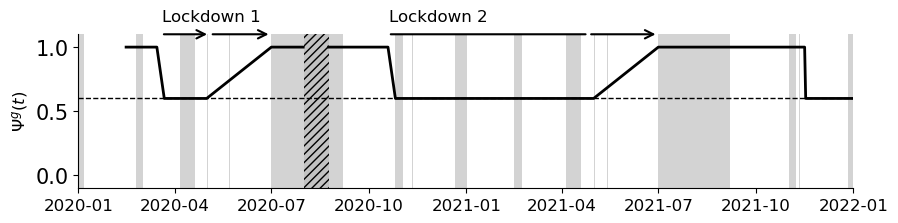

In [71]:
from covid19_DTM.visualization.output import *

start_date = datetime(2020, 1, 1, 0, 0)
end_date = datetime(2022, 1, 1, 0, 0)

fig, ax = plt.subplots(figsize=(10,2))
ticklabelsize = 12
ax.grid(False)
ax.set_xlim(start_date, end_date)
ylim=1.1
ax.set_ylim(-0.1, ylim)

week_color='white'#'white'
weekend_color='white'#'lightgrey'
vacation_color='lightgrey'#weekend_color
color_timeframes(start_date, end_date, ax=ax, week_color=week_color, weekend_color=weekend_color, vacation_color=vacation_color)

# ax.set_title('test', size=14)

ax.plot(google_df_ment_nat.index, google_df_ment_nat.values, linewidth=2, color='black')#, linestyle='-.', color='gray')
# google_df_ment.plot(ax=ax, legend=False, linewidth=1.5)#, color=['k', 'blue', 'k', 'blue', 'k', 'blue'])
ax.set_xlabel(None, size=ticklabelsize)
ax.set_ylabel('$\Psi^g(t)$', size=ticklabelsize)
plt.xticks(rotation=0, size=ticklabelsize)

ax.set_xlim(start_date, end_date)

ax.axhline(mentality_cal, linewidth=1, linestyle='--', color='k')
ax.axvspan(t4, t5, facecolor='gray', hatch='////', alpha=0.2)

ax.grid(False)

#####################
## Lockdown arrows ##
#####################

# Key dates
t4 = pd.Timestamp(2020, 3, 19, 0, 0) 
t5 = pd.Timestamp(2020, 5, 4, 0, 0)
t8 = pd.Timestamp(2020, 7, 1, 0, 0)
t11 = pd.Timestamp(2020, 10, 19, 0, 0)
t17 = pd.Timestamp(2021, 4, 26, 0, 0) 
t22 = pd.Timestamp(2021, 7, 1, 0, 0) 
t26 = pd.Timestamp(2021, 11, 17, 0, 0) 

# Add arrows denoting lockdown periods
linewidth=1.5
label_lockdown_size = 12
label_lockdown_move_up = 0.10
arrow_height = ylim
# First lockdown
ax.annotate(text='', xy=(t4, arrow_height), xytext=(t5,arrow_height), \
            arrowprops=dict(arrowstyle='<-',linewidth=linewidth))
ax.text(t4 + pd.Timedelta(days=1), \
        ylim + label_lockdown_move_up, 'Lockdown 1', size=label_lockdown_size)
# Lockdown release
ax.annotate(text='', xy=(t5, arrow_height), xytext=(t8,arrow_height), \
            arrowprops=dict(arrowstyle='<-',linewidth=linewidth))
# Second lockdown
label_lockdown1_move_right = -2.5 # days
ax.annotate(text='', xy=(t11, arrow_height), xytext=(t17,arrow_height), \
            arrowprops=dict(arrowstyle='-',linewidth=linewidth))
ax.text(t11 + pd.Timedelta(days=1), \
        ylim + label_lockdown_move_up, 'Lockdown 2', size=label_lockdown_size)
arrow_height = ylim
# Lockdown release
ax.annotate(text='', xy=(t17, arrow_height), xytext=(t22,arrow_height), \
            arrowprops=dict(arrowstyle='<-', linewidth=linewidth))


plt.savefig("mentality_timeseries.pdf", bbox_inches='tight', dpi=400)

## Provincial tweaking: summer of 2020

In [60]:
# Use the Google dataframe with new columns
google_df_ment = get_google_mobility_data(update=False, provincial=True)
google_df_ment = google_df_ment.drop(columns=['parks', 'residential'])
google_df_ment.drop(columns=['retail_recreation', 'grocery', 'transport', 'work'], inplace=True)

google_df_ment['mentality'] = 0
google_df_ment = google_df_ment.unstack().mentality

# Example
google_df_ment.loc['2020-02-15'] = np.ones(11)

google_df_ment.head()

NIS,10000,20001,20002,21000,30000,40000,50000,60000,70000,80000,90000
date,,,,,,,,,,,
2020-02-15,1,1,1,1,1,1,1,1,1,1,1
2020-02-16,0,0,0,0,0,0,0,0,0,0,0
2020-02-17,0,0,0,0,0,0,0,0,0,0,0
2020-02-18,0,0,0,0,0,0,0,0,0,0,0
2020-02-19,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# Indices
idx_F = [0, 1, 4, 5, 8]
idx_Bxl = [3,]
idx_W = [2, 6, 7, 9, 10]
# Second wave peak height ratios
mentality_summer_2020_lockdown = np.array([1, 1.12,         # F
                                        1.12,               # W
                                        1.12,               # Bxl
                                        1, 1.13,            # F: W-Fla: 1.45
                                        2.15, 1.93,         # W
                                        1,                  # F: Lim: 1.43
                                        1.16, 1.30])        # W

# Summer rescaling found during calibration
summer_rescaling_F = 0.68
summer_rescaling_W = 0.40
summer_rescaling_B = 0.81
mentality_summer_2020_lockdown[idx_F] *= summer_rescaling_F
mentality_summer_2020_lockdown[idx_Bxl] *= summer_rescaling_B
mentality_summer_2020_lockdown[idx_W] *= summer_rescaling_W

In [6]:
# calibration values

agg_dim=11

mentality_cal = 0.60*np.ones(agg_dim) # estimate
mentality_cal_min = 0.55*np.ones(agg_dim) # estimate
mentality_cal_max = 0.65*np.ones(agg_dim) # estimate


# google_df_ment.loc[google_df_ment.index>=t0] = mentality_cal
# google_df_ment.loc[google_df_ment.index>=t1] = mentality_cal
# google_df_ment.loc[google_df_ment.index>=t2] = mentality_cal
google_df_ment.loc[google_df_ment.index>=t3] = np.ones(agg_dim)
google_df_ment.loc[google_df_ment.index>=t4] = mentality_summer_2020_lockdown
google_df_ment.loc[google_df_ment.index>=t5] = np.ones(agg_dim)
# google_df_ment.loc[google_df_ment.index>=t6] = mentality_cal
# google_df_ment.loc[google_df_ment.index>=t7] = mentality_cal
# google_df_ment.loc[google_df_ment.index>=t8] = mentality_cal
# google_df_ment.loc[google_df_ment.index>=t9] = mentality_cal
# google_df_ment.loc[google_df_ment.index>=t10] = mentality_cal
# google_df_ment.loc[google_df_ment.index>=t11] = mentality_cal
# google_df_ment.loc[google_df_ment.index>=t12] = mentality_cal
# google_df_ment.loc[google_df_ment.index>=t13] = mentality_cal
# google_df_ment.loc[google_df_ment.index>=t14] = mentality_cal
# google_df_ment.loc[google_df_ment.index>=t15] = mentality_cal
# google_df_ment.loc[google_df_ment.index>=t16] = mentality_cal
# google_df_ment.loc[google_df_ment.index>=t17] = mentality_cal
# google_df_ment.loc[google_df_ment.index>=t18] = mentality_cal
# google_df_ment.loc[google_df_ment.index>=t19] = mentality_cal
# google_df_ment.loc[google_df_ment.index>=t20] = mentality_cal
# google_df_ment.loc[google_df_ment.index>=t21] = mentality_cal
# google_df_ment.loc[google_df_ment.index>=t22] = mentality_cal
# google_df_ment.loc[google_df_ment.index>=t23] = mentality_cal
# google_df_ment.loc[google_df_ment.index>=t24] = mentality_cal
# google_df_ment.loc[google_df_ment.index>=t25] = mentality_cal
# google_df_ment.loc[google_df_ment.index>=t26] = mentality_cal
# google_df_ment.loc[google_df_ment.index>=t27] = mentality_cal
# google_df_ment.loc[google_df_ment.index>=t28] = mentality_cal
# google_df_ment.loc[google_df_ment.index>=t29] = mentality_cal

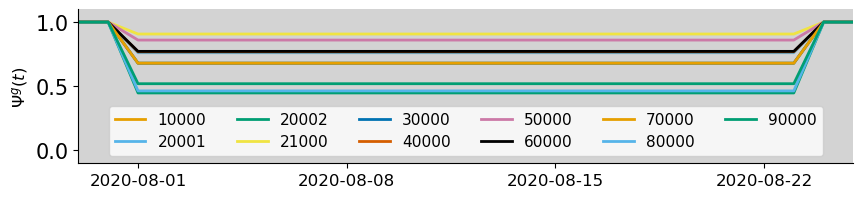

In [7]:
from covid19_DTM.visualization.utils import moving_avg
from covid19_DTM.visualization.output import *
from covid19_DTM.data import sciensano

start_date = t4 - pd.Timedelta(days=2)
end_date = t5 + pd.Timedelta(days=1)

fig, ax = plt.subplots(figsize=(10,2))
ticklabelsize = 12
ax.grid(False)
ax.set_xlim(start_date, end_date)
ylim=1.10
ax.set_ylim(-0.1, ylim)

week_color='white'#'white'
weekend_color='white'#'lightgrey'
vacation_color='lightgrey'#weekend_color
color_timeframes(start_date, end_date, ax=ax, week_color=week_color, weekend_color=weekend_color, vacation_color=vacation_color)

ax.axvspan(start_date, end_date, facecolor=vacation_color, alpha=0.5)

# ax.set_title('test', size=14)

labels = google_df_ment.columns
ax.plot(google_df_ment.index, google_df_ment.values, linewidth=2, label=labels)#, linestyle='-.', color='gray')
# google_df_ment.plot(ax=ax, legend=False, linewidth=1.5)#, color=['k', 'blue', 'k', 'blue', 'k', 'blue'])
ax.set_xlabel(None, size=ticklabelsize)
ax.set_ylabel('$\Psi^g(t)$', size=ticklabelsize)
plt.xticks([pd.Timestamp(2020, 8, 1), pd.Timestamp(2020, 8, 8), pd.Timestamp(2020, 8, 15), pd.Timestamp(2020, 8, 22), pd.Timestamp(2020, 8, 29)], rotation=0, size=ticklabelsize)

ax.set_xlim(start_date, end_date)

ax.grid(False)

plt.legend(loc=8, ncol=6, fontsize=ticklabelsize-1)

plt.savefig("mentality_timeseries_summer2020.pdf", bbox_inches='tight', dpi=400)

# Resulting social contact matrix

In [46]:
from covid19_DTM.models.TDPF import *
from covid19_DTM.data.model_parameters import *

Nc_dict = get_integrated_interaction_matrices()
print(Nc_dict['total'])
Nc_dict['total'] = np.expand_dims(Nc_dict['total'],axis=0)

google_df_CMF = get_google_mobility_data(update=False, provincial=True)

CMF = make_contact_matrix_function(google_df_CMF, Nc_dict, G=11)

eff_home_cal = 1 
eff_schools_cal = 0.40
eff_work_cal = 0.40
eff_rest_cal = 0.40
mentality_cal = 0.60

l1 = 7
l2 = 7

states = {'H_in': [0,]}
param = 0

###################
# MAKE TWO EXAMPLES
# [g, i, j]
# ages: 0-12, 12-18, 18-25, 25-35, 35-45, 45-55, 55-65, 65-75, 75-85, 85+

gg1 = 3
ii1 = 2
jj1 = 3

gg2 = 3
ii2 = 5
jj2 = 7

###################

dates = google_df_CMF.unstack().index

CMF1 = np.zeros(len(dates))
CMF2 = np.zeros(len(dates))
for i, date in enumerate(dates):
    CMF_value1 = CMF.policies_all_spatial(date, states, param, l1, l2, eff_schools_cal,
                     eff_work_cal, eff_rest_cal, eff_home_cal, mentality_cal, 0, 0.67, 0.40, 0.81)[gg1, ii1, jj1]
    CMF_value2 = CMF.policies_all_spatial(date, states, param, l1, l2, eff_schools_cal,
                     eff_work_cal, eff_rest_cal, eff_home_cal, mentality_cal, 0, 0.67, 0.40, 0.81)[gg2, ii2, jj2]
    CMF1[i] = CMF_value1
    CMF2[i] = CMF_value2

[[1.96139488e+01 1.62223494e+00 1.01845485e+00 3.62363801e+00
  4.73790609e+00 1.83410833e+00 1.53454814e+00 6.60731257e-01
  4.71850330e-01 1.65662280e-02]
 [3.16039393e+00 2.09443049e+01 4.04068592e+00 4.81276110e+00
  4.60761314e+00 3.59365096e+00 4.76706801e-01 5.37182545e-01
  1.95874792e-01 1.76726419e-01]
 [1.62155878e+00 3.30231537e+00 1.13493613e+01 4.70230671e+00
  3.27653868e+00 5.51115055e+00 1.24485793e+00 3.35801479e-01
  2.04098814e-01 4.41340188e-02]
 [3.78307711e+00 2.57909432e+00 3.08333294e+00 8.76013183e+00
  5.55879058e+00 5.89628620e+00 3.23179477e+00 6.41492333e-01
  3.64137722e-01 9.29485658e-02]
 [4.59011577e+00 2.29131993e+00 1.99370810e+00 5.15842495e+00
  8.35032219e+00 5.48663158e+00 2.56070277e+00 1.21639810e+00
  4.55867406e-01 7.40689222e-02]
 [1.70679907e+00 1.71658709e+00 3.22113385e+00 5.25576070e+00
  5.27018698e+00 8.11432294e+00 3.68711873e+00 1.60981740e+00
  9.91578364e-01 1.47341665e-01]
 [1.69794428e+00 2.70748961e-01 8.65110908e-01 3.42520290e

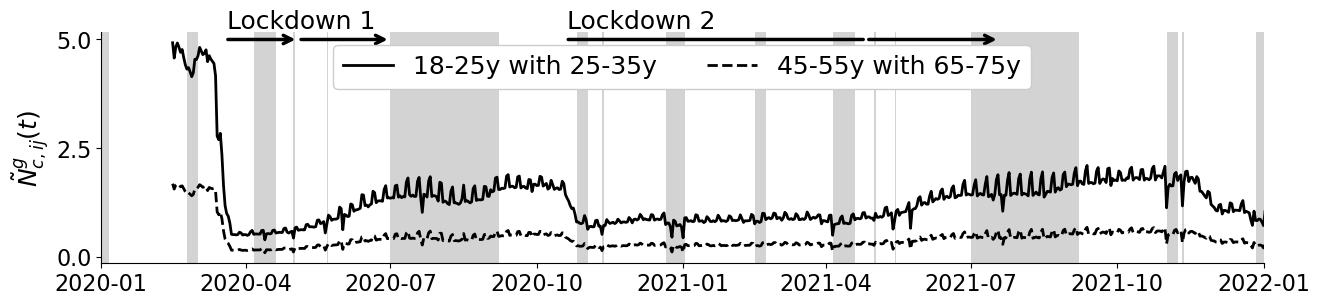

In [47]:
from covid19_DTM.visualization.utils import moving_avg
from covid19_DTM.visualization.output import *
from covid19_DTM.data import sciensano

start_date = datetime(2020, 1, 1, 0, 0)
end_date = datetime(2022, 1, 1, 0, 0)

fig, ax = plt.subplots(figsize=(15,3))
ticklabelsize = 16
ax.grid(False)
ax.set_xlim(start_date, end_date)
ylim=5
# ax.set_ylim(-0.1, ylim)

week_color='white'#'white'
weekend_color='white'#'lightgrey'
vacation_color='lightgrey'#weekend_color
color_timeframes(start_date, end_date, ax=ax, week_color=week_color, weekend_color=weekend_color, vacation_color=vacation_color)

# ax.set_title('test', size=14)

labels = google_df_ment.columns
ax.plot(dates, CMF1, linewidth=2, label='18-25y with 25-35y', color='black')
ax.plot(dates, CMF2, linewidth=2, label='45-55y with 65-75y', color='black', linestyle='dashed')
ax.set_xlabel(None, size=ticklabelsize)
ax.set_ylabel('$\\tilde{N}^g_{c,ij}(t)$', size=ticklabelsize+2)
plt.xticks(rotation=0, size=ticklabelsize)
plt.yticks([0,2.5,5], size=ticklabelsize)

ax.grid(False)

plt.legend(loc=9, ncol=2, fontsize=ticklabelsize+2, framealpha=1)

#####################
## Lockdown arrows ##
#####################

# Key dates
t4 = pd.Timestamp(2020, 3, 19, 0, 0) 
t5 = pd.Timestamp(2020, 5, 4, 0, 0)
t8 = pd.Timestamp(2020, 7, 1, 0, 0)
t11 = pd.Timestamp(2020, 10, 19, 0, 0)
t17 = pd.Timestamp(2021, 4, 26, 0, 0) 
t22 = pd.Timestamp(2021, 7, 19, 0, 0) 
t26 = pd.Timestamp(2021, 11, 17, 0, 0) 

# Add arrows denoting lockdown periods
linewidth=2.5
label_lockdown_size = 18
label_lockdown_move_up = 0.25
arrow_height = ylim
# First lockdown
ax.annotate(text='', xy=(t4, arrow_height), xytext=(t5,arrow_height), \
            arrowprops=dict(arrowstyle='<-',linewidth=linewidth))
ax.text(t4 + pd.Timedelta(days=1), \
        ylim + label_lockdown_move_up, 'Lockdown 1', size=label_lockdown_size)
# Lockdown release
ax.annotate(text='', xy=(t5, arrow_height), xytext=(t8,arrow_height), \
            arrowprops=dict(arrowstyle='<-',linewidth=linewidth))
# Second lockdown
label_lockdown1_move_right = -2.5 # days
ax.annotate(text='', xy=(t11, arrow_height), xytext=(t17,arrow_height), \
            arrowprops=dict(arrowstyle='-',linewidth=linewidth))
ax.text(t11 + pd.Timedelta(days=1), \
        ylim + label_lockdown_move_up, 'Lockdown 2', size=label_lockdown_size)
arrow_height = ylim
# Lockdown release
ax.annotate(text='', xy=(t17, arrow_height), xytext=(t22,arrow_height), \
            arrowprops=dict(arrowstyle='<-', linewidth=linewidth))

plt.savefig("resulting_Nc_21000_18-25-with-25-35_45-55-with-65-75.png", bbox_inches='tight', dpi=600)
plt.savefig("resulting_Nc_21000_18-25-with-25-35_45-55-with-65-75.pdf", bbox_inches='tight')